In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error


In [2]:
df = pd.read_csv ("ratings_Clothing_Shoes_and_Jewelry.csv")
df.head()

,A2XVJBSRI3SWDI,0000031887,5.0,1383523200
0,A2G0LNLN79Q6HR,0000031887,4.0,1337990400
1,A2R3K1KX09QBYP,0000031887,2.0,1361059200
2,A19PBP93OF896,0000031887,1.0,1363824000
3,A1P0IHU93EF9ZK,0000031887,4.0,1390435200
4,A3Q6CTO56DJ8UZ,0000031887,4.0,1268697600


In [3]:
df.columns = ['userid', 'productid', 'rating', 'timestamp']
df.head()

,userid,productid,rating,timestamp
0,A2G0LNLN79Q6HR,0000031887,4.0,1337990400
1,A2R3K1KX09QBYP,0000031887,2.0,1361059200
2,A19PBP93OF896,0000031887,1.0,1363824000
3,A1P0IHU93EF9ZK,0000031887,4.0,1390435200
4,A3Q6CTO56DJ8UZ,0000031887,4.0,1268697600


In [4]:
df.shape

(5748919, 4)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5748919 entries, 0 to 5748918
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userid     object 
 1   productid  object 
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 175.4+ MB


In [6]:
df.drop(['timestamp'], axis=1, inplace = True)
df.head()

,userid,productid,rating
0,A2G0LNLN79Q6HR,0000031887,4.0
1,A2R3K1KX09QBYP,0000031887,2.0
2,A19PBP93OF896,0000031887,1.0
3,A1P0IHU93EF9ZK,0000031887,4.0
4,A3Q6CTO56DJ8UZ,0000031887,4.0


In [7]:
df.isna().sum()

userid       0
productid    0
rating       0
dtype: int64

In [8]:
rating_combination = ['userid', 'productid']
df[df.duplicated(subset=rating_combination, keep=False)].sort_values(rating_combination).head()

,userid,productid,rating


In [9]:
print(df['userid'].nunique())
print(df['productid'].nunique())

3117268
1136004


In [10]:
df['rating'].describe()

count    5.748919e+06
mean     4.144679e+00
std      1.233104e+00
min      1.000000e+00
25%      4.000000e+00
50%      5.000000e+00
75%      5.000000e+00
max      5.000000e+00
Name: rating, dtype: float64

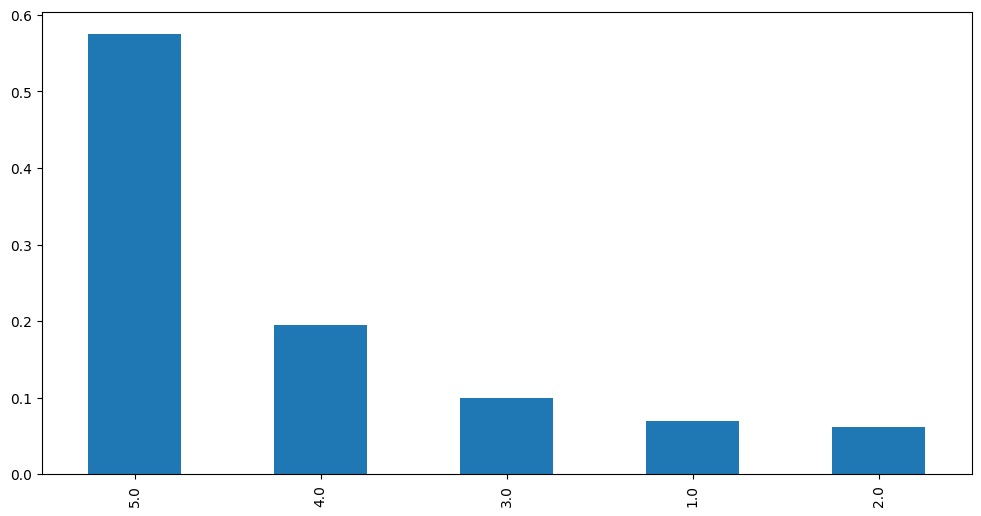

In [11]:
plt.figure(figsize = (12,6))
df['rating'].value_counts(1).plot(kind='bar')
plt.show()

In [12]:
#users with most number of rating
most_rated = df.groupby('userid').size().sort_values(ascending = False)[:10]
most_rated

userid
A3W4D8XOGLWUN5    349
A5QQRB2QOY96U     289
A2KBV88FL48CFS    278
A1Z4LX3Q1YMF84    274
A1RRMZKOMZ2M7J    259
A2J4XMWKR8PPD0    256
A2EA0JE6LV4BXH    249
A2GA55P7WGHJCP    240
A1XQ0F01CF84Y3    225
A29BPMJI0ZYH4H    197
dtype: int64

In [13]:
#only keeping the users who have given 40 or more ratings
counts = df['userid'].value_counts()
counts
df_final = df[df['userid'].isin(counts[counts >= 40].index)]

In [14]:
print(df_final.shape)
print(df_final['userid'].nunique())
print(df_final['productid'].nunique())

(76302, 3)
1292
65315


In [15]:
df_final

,userid,productid,rating
43,A1RLQXYNCMWRWN,0000031887,5.0
152,AJ6B83I4YJHYW,0000031887,5.0
444,A1F7YU6O5RU432,1608299953,5.0
466,A1R377IPZOKLMM,1608299953,5.0
600,AN81JUYW2SL24,1617160377,4.0
...,...,...,...
5748886,A3PN3LJGOHDDYB,B00LSTNH7U,5.0
5748887,A3PN3LJGOHDDYB,B00LSTZKZ2,5.0
5748900,A3PN3LJGOHDDYB,B00LT05HAS,5.0
5748902,A1H04CRIJ2ASD6,B00LU0ZXJM,5.0


In [16]:
final_ratings_matrix_product = df_final.pivot(index = 'productid', columns ='userid', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix_product.shape)

Shape of final_ratings_matrix:  (65315, 1292)


In [17]:
final_ratings_matrix = df_final.pivot(index = 'userid', columns ='productid', values = 'rating').fillna(0)
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

Shape of final_ratings_matrix:  (1292, 65315)


In [18]:
given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

given_num_of_ratings =  76302


In [19]:
possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

possible_num_of_ratings =  84386980


In [20]:
final_ratings_matrix

productid,0000031887,1608299953,1617160377,500000003X,8742245117,B00001T38R,B00001T38Y,B00001TQ34,B00001W0J3,B000034DKV,...,B00LK09U3M,B00LK0IQGY,B00LLHU588,B00LMH3SHW,B00LMQCBVC,B00LOP5Q6I,B00LSTNH7U,B00LSTZKZ2,B00LT05HAS,B00LU0ZXJM
userid,,,,,,,,,,,,,,,,,,,,,
A104SG9QZ92UAH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A1084V41BP7RDH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10OZSMV7HOTCF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10QCZUQ53TNRP,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A10VVD2S6W6ICO,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AZ9VR9ESKVJEV,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZB0AM0LMJNDD,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AZC097NSZCUQ8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
final_ratings_matrix['user_index'] = np.arange(0, final_ratings_matrix.shape[0])
final_ratings_matrix.set_index(['user_index'], inplace=True)

# Actual ratings given by users
final_ratings_matrix.head()

productid,0000031887,1608299953,1617160377,500000003X,8742245117,B00001T38R,B00001T38Y,B00001TQ34,B00001W0J3,B000034DKV,...,B00LK09U3M,B00LK0IQGY,B00LLHU588,B00LMH3SHW,B00LMQCBVC,B00LOP5Q6I,B00LSTNH7U,B00LSTZKZ2,B00LT05HAS,B00LU0ZXJM
user_index,,,,,,,,,,,,,,,,,,,,,
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
final_ratings_matrix.shape

(1292, 65315)

In [23]:
from sklearn.neighbors import NearestNeighbors

k = 5

model = NearestNeighbors(n_neighbors=k , metric='cosine')
model.fit(final_ratings_matrix)

distances, indices = model.kneighbors(final_ratings_matrix)


In [24]:
def get_recommendations(user_index, num_recommendations=5):
    # Get the indices of k-nearest neighbors
    neighbor_indices = indices[user_index, 1:]

    # Find products that the user has not interacted with
    user_products = final_ratings_matrix.columns[final_ratings_matrix.loc[user_index] > 0]
    neighbor_products = set(final_ratings_matrix.columns[final_ratings_matrix.iloc[neighbor_indices].sum(axis=0) > 0])
    recommendations = list(neighbor_products.difference(user_products))

    # Return top N recommendations
    return recommendations[:num_recommendations]

In [25]:
user_index_to_recommend = 899  
recommended_products = get_recommendations(user_index_to_recommend)
print(f"Recommended products for user {user_index_to_recommend}: {recommended_products}")

Recommended products for user 899: ['B004OYR8WG', 'B00FXY50YY', 'B00EQ9VZDC', 'B00CUAJ7WU', 'B00172K01O']


In [26]:
'''def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]):
        
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])

        similarity.append((user,sim))

    similarity.sort(key=lambda x: x[1], reverse = True)
    most_similar_users = [tup[0] for tup in similarity]
    similarity_score = [tup[1] for tup in similarity]

    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])

    return most_similar_users, similarity_score'''

'def similar_users(user_index, interactions_matrix):\n    similarity = []\n    for user in range(0, interactions_matrix.shape[0]):\n        \n        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])\n\n        similarity.append((user,sim))\n\n    similarity.sort(key=lambda x: x[1], reverse = True)\n    most_similar_users = [tup[0] for tup in similarity]\n    similarity_score = [tup[1] for tup in similarity]\n\n    most_similar_users.remove(user_index)\n    similarity_score.remove(similarity_score[0])\n\n    return most_similar_users, similarity_score'

In [27]:
'''similar = similar_users(953, final_ratings_matrix)[0][0:10]
similar'''

'similar = similar_users(953, final_ratings_matrix)[0][0:10]\nsimilar'

In [28]:
'''similar_users(200,final_ratings_matrix)[1][0:10]'''

'similar_users(200,final_ratings_matrix)[1][0:10]'

In [29]:
'''def recommendations(user_index, num_of_products, interactions_matrix):
    
    #Saving similar users using the function similar_users defined above
    most_similar_users = similar_users(user_index, interactions_matrix)[0]
    
    #Finding product IDs with which the user_id has interacted
    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))
    recommendations = []
    
    observed_interactions = prod_ids.copy()
    for similar_user in most_similar_users:
        if len(recommendations) < num_of_products:
            
            #Finding 'n' products which have been rated by similar users but not by the user_id
            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))
            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))
            observed_interactions = observed_interactions.union(similar_user_prod_ids)
        else:
            break
    
    return recommendations[:num_of_products]'''

"def recommendations(user_index, num_of_products, interactions_matrix):\n    \n    #Saving similar users using the function similar_users defined above\n    most_similar_users = similar_users(user_index, interactions_matrix)[0]\n    \n    #Finding product IDs with which the user_id has interacted\n    prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[user_index] > 0)]))\n    recommendations = []\n    \n    observed_interactions = prod_ids.copy()\n    for similar_user in most_similar_users:\n        if len(recommendations) < num_of_products:\n            \n            #Finding 'n' products which have been rated by similar users but not by the user_id\n            similar_user_prod_ids = set(list(interactions_matrix.columns[np.where(interactions_matrix.loc[similar_user] > 0)]))\n            recommendations.extend(list(similar_user_prod_ids.difference(observed_interactions)))\n            observed_interactions = observed_interactions.union(similar_user_prod_

In [30]:
'''recommendations(3,5,final_ratings_matrix)'''


'recommendations(3,5,final_ratings_matrix)'